### DECISION TREE

#### About this Notebook

In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients, and their response to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

In [57]:
import matplotlib as plt
print('Matplotlib Version :', plt.__version__ )

Matplotlib Version : 3.2.1


##### Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##### Checking Directory

In [59]:
import os 
os.getcwd()

'C:\\Users\\gaura\\OneDrive\\Desktop\\Anaconda\\Coursera\\MachineLearning-Python\\3 - Classification\\Decision Trees'

##### Getting Data 

In [60]:
df = pd.read_csv('drug200.csv')
print('Data Imported Successfully')

Data Imported Successfully


In [61]:
df.shape

(200, 6)

In [62]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


##### Checking Null Values


In [64]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

##### Visualization

In [65]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [66]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

Number of drug based upon catgory - Drug A, Drug B, Drug C, Drug X, Drug Y
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


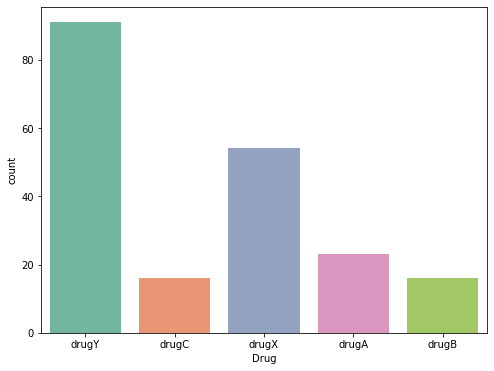

In [67]:
# Drug Category

print('Number of drug based upon catgory - Drug A, Drug B, Drug C, Drug X, Drug Y')
print(df['Drug'].value_counts())

plt.figure(figsize=(8,6))
sns.countplot(x='Drug', data=df, palette='Set2')
plt.show()

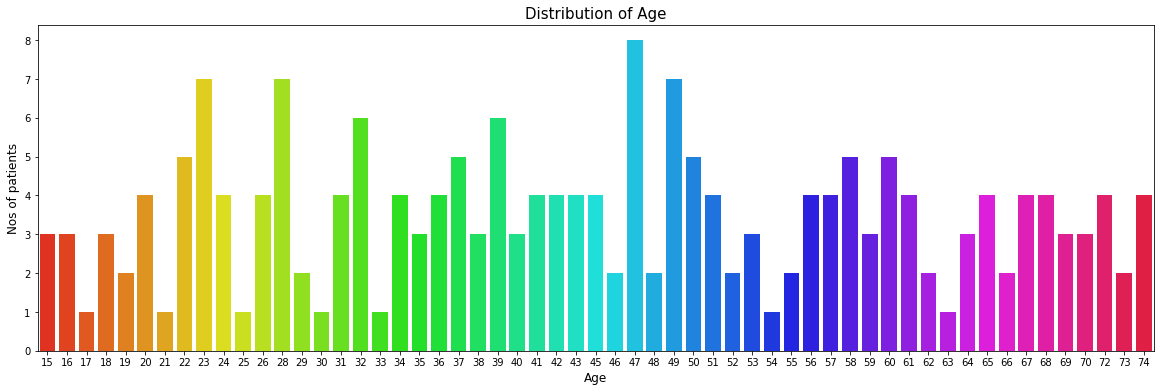

In [68]:
# Age Distribution

plt.figure(figsize = (20,6))
sns.countplot(x = 'Age', data=df, palette='hsv')
plt.title('Distribution of Age', fontsize = 15, color='Black')
plt.xlabel('Age', fontsize = 12, color='Black')
plt.ylabel('Nos of patients',fontsize = 12, color='Black')
plt.show()

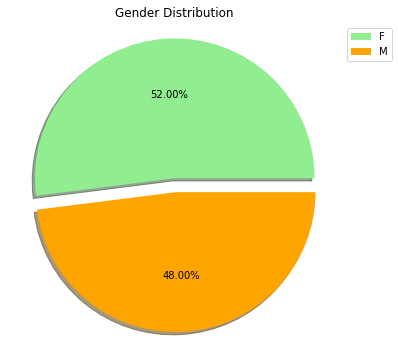

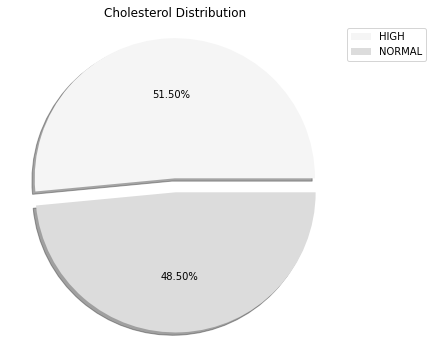

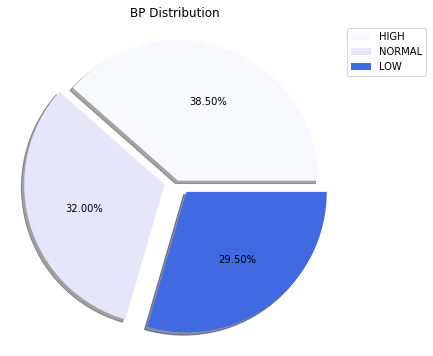

In [69]:
# Gender/Sex
labels = ['F', 'M']
size = df['Sex'].value_counts()
colors = ['lightgreen','orange']
explode =[0, 0.1]
plt.figure(figsize = (6,6))
plt.title('Gender Distribution')
plt.pie(size, explode, colors=colors, shadow=True, autopct='%.2f%%', pctdistance=0.6, )
plt.axis('equal')
plt.legend(labels, loc='upper left', bbox_to_anchor = (1,1))

plt.show()


# Cholesterol
labels = ['HIGH', 'NORMAL']
size = df['Cholesterol'].value_counts()
colors = ['whitesmoke','gainsboro']
explode =[0, 0.1]
plt.figure(figsize = (6,6))
plt.title('Cholesterol Distribution')
plt.pie(size, explode, colors=colors, shadow=True, autopct='%.2f%%', pctdistance=0.6)
plt.axis('equal')
plt.legend(labels, loc='upper left', bbox_to_anchor = (1,1))

plt.show()


# BP
labels = ['HIGH', 'NORMAL', 'LOW']
size = df['BP'].value_counts()
colors = ['ghostwhite','lavender','royalblue']
explode =[0, 0.1, 0.1]
plt.figure(figsize = (6,6))
plt.title('BP Distribution')
plt.pie(size, explode, colors=colors, shadow=True, autopct='%.2f%%', pctdistance=0.6)
plt.axis('equal')
plt.legend(labels, loc='upper left', bbox_to_anchor = (1,1))

plt.show()

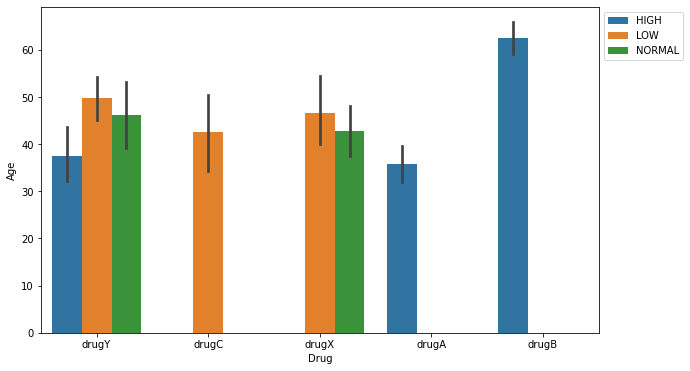

In [70]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Drug'], y=df['Age'], hue=df['BP'], data=df)
plt.legend(loc='upper left', bbox_to_anchor = (1,1))
plt.show()

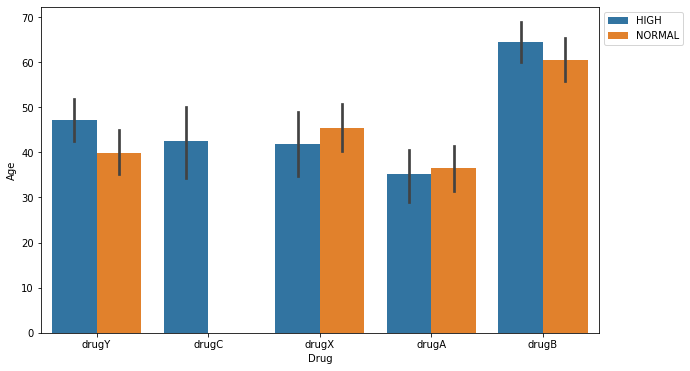

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Drug'], y=df['Age'], hue=df['Cholesterol'], data=df)
plt.legend(loc='upper left', bbox_to_anchor = (1,1))
plt.show()

##### Splitting Data - Independent & Dependent Variable

In [72]:
X = df.iloc[:,0:5].values
y = df.iloc[:,5:6].values

As you may figure out, some features in this dataset are categorical such as **Sex**, **BP**, **Cholesterol**. Unfortunately, sklearn decision trees do not handle categorical variables. But still we can convert these features to numerical values. 

##### Categorical Data 

In [73]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
X[:, 1] = le_sex.fit_transform(X[:, 1])

le_bp = LabelEncoder()
X[:, 2] = le_bp.fit_transform(X[:, 2])

le_cholesterol = LabelEncoder()
X[:, 3] = le_cholesterol.fit_transform(X[:, 3])

##### Model Training and Test

In [74]:
#Training and Splitting 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [75]:
X_train.shape

(160, 5)

In [76]:
X_test.shape

(40, 5)

In [77]:
y_train.shape

(160, 1)

In [78]:
y_test.shape

(40, 1)

In [79]:
# Model Building

from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [80]:
y_hat = model_dt.predict(X_test)

In [81]:
# Accuracy and Confusion Matrix

from sklearn import metrics
print("Train set Accuracy : ", metrics.accuracy_score(y_train, model_dt.predict(X_train)))
print("Test set Accuracy  : ", metrics.accuracy_score(y_test, y_hat))

pd.crosstab(y_test.flatten(), y_hat, rownames=['Actual Species'], colnames = ['Predicted Species'])

Train set Accuracy :  1.0
Test set Accuracy  :  1.0


Predicted Species,drugA,drugB,drugC,drugX,drugY
Actual Species,,,,,
drugA,4,0,0,0,0
drugB,0,4,0,0,0
drugC,0,0,4,0,0
drugX,0,0,0,16,0
drugY,0,0,0,0,12


In [82]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [83]:
#Prediction

test_1 = X[0:2,:]
y_hat1 = model_dt.predict(test_1)
y_hat1

array(['drugY', 'drugC'], dtype=object)

In [84]:
test_2 = [[23,'F','LOW','NORMAL',25]]
X_1 = pd.DataFrame(test_2).values

from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
X_1[:,1] = le_sex.fit_transform(X_1[:,1])

le_bp = LabelEncoder()
X_1[:,2] = le_bp.fit_transform(X_1[:,2])

le_cholesterol = LabelEncoder()
X_1[:,3] = le_cholesterol.fit_transform(X_1[:,3])


y_hat1 = model_dt.predict(X_1)
y_hat1

array(['drugY'], dtype=object)